In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Load the dataset into python environment

In [2]:
data1 =pd.read_csv("titanic_dataset.csv")
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2.Make passengerId as index column

In [3]:
data =data1.set_index("PassengerId")
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3.Check the basic details of te dataset

In [4]:
data.shape

(891, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# 4.Fill in all the missing values present in all the columns in the dataset

       Age, Cabin,Embarked columns contain missing values

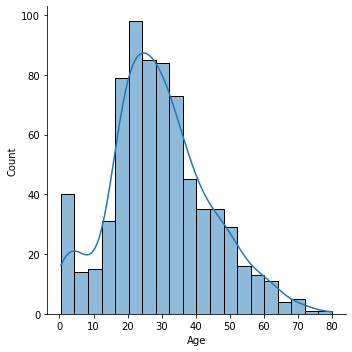

In [8]:
sns.displot(data['Age'],kde=True)

In [9]:
data['Age'] = data['Age'].fillna(data['Age'].median())


In [10]:
data['Age'].isna().sum() # null values are replaced

0

In [11]:
data['Cabin'] = data['Cabin'].fillna('Unknown')

In [12]:
data['Cabin'].isna().sum() # null values are replaced

0

In [13]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

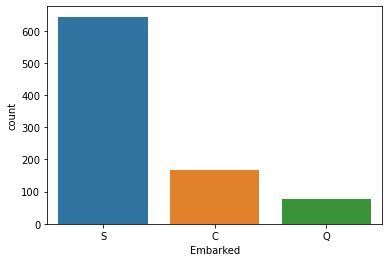

In [14]:
sns.countplot(x='Embarked',data=data)

more number of passengers embarked from S. Null values can filled with S

In [61]:
data['Embarked'] = data['Embarked'].fillna('S')

In [62]:
data['Embarked'].isna().sum() #Null values are filled

0

In [17]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

all the missing values ara filled

# 5.Check and handle outliers in at least 3 columns in the dataset

<AxesSubplot:xlabel='Age'>

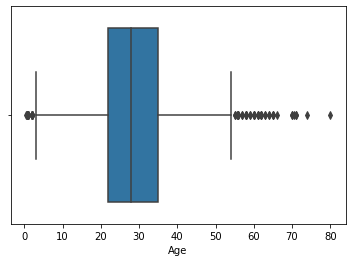

In [19]:
sns.boxplot(x='Age',data=data)

In [20]:
q1,q2,q3 = np.percentile(data['Age'],[25,50,75])
q1,q2,q3

(22.0, 28.0, 35.0)

In [21]:
IQR = q3-q1
IQR

13.0

In [22]:
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)

lower =  2.5
upper =  54.5


In [23]:
outlier = []
for i in data['Age']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [ ]:
#we can not drop the outliers in age.

Text(0.5, 1.0, 'Box plot of Fare')

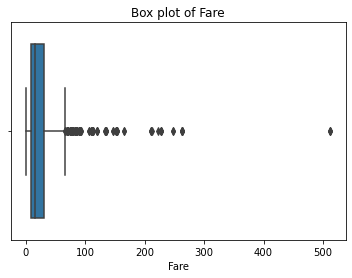

In [24]:
sns.boxplot(x='Fare',data=data)
plt.title('Box plot of Fare')

In [25]:
q1,q2,q3 = np.percentile(data['Fare'],[25,50,75])
q1,q2,q3

(7.9104, 14.4542, 31.0)

In [26]:
IQR = q3-q1
IQR

23.0896

In [27]:
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)

lower =  -26.724
upper =  65.6344


In [28]:
outlier = []
for i in data['Fare']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)


In [29]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [30]:
data['Fare'] = np.where(data['Fare']>upper_limit ,upper_limit,data['Fare'] )

<AxesSubplot:xlabel='Fare'>

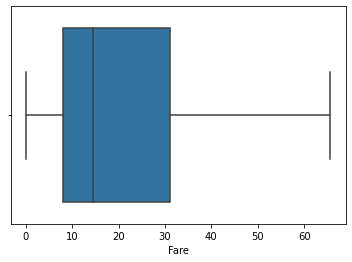

In [31]:
sns.boxplot(x='Fare',data=data)

outliers in fare column is handled

In [32]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<AxesSubplot:xlabel='SibSp'>

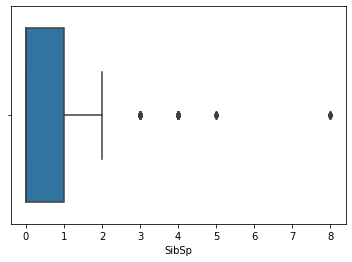

In [33]:
sns.boxplot(x="SibSp",data=data)

<Figure size 1440x360 with 0 Axes>

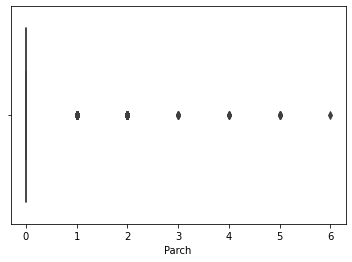

<Figure size 1440x360 with 0 Axes>

In [34]:
sns.boxplot(x="Parch",data=data)
plt.figure(figsize=(20,5))


outliers in sibsp and parch can keep as it is

# 6.Do minmax scaling on the feature set(take survived as target)

In [35]:
#name,ticket, cabin has unique values
data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [37]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,65.6344,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [39]:
#encoding sex and Embark
df = pd.get_dummies(data,columns=['Sex','Embarked'],drop_first=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,65.6344,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1


<AxesSubplot:>

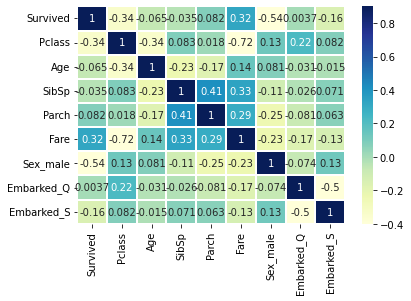

In [48]:
corrmatrix =df.corr()
sns.heatmap(corrmatrix,vmin=-0.4,vmax=0.9,annot=True,linewidth=.2,cmap='YlGnBu')

In [53]:
y=df['Survived']
x=df.drop('Survived', axis=1)

In [54]:
#training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [55]:
from sklearn import linear_model
lr= linear_model.LinearRegression()
model= lr.fit(x_train,y_train)
prediction =model.predict(x_test)

In [56]:
#compare with MSE and r2 value
from sklearn.metrics import mean_squared_error as msr
from sklearn.metrics import r2_score
print('MSE is : ', msr(y_test,prediction))
print('r2 value is :', r2_score(y_test,prediction))

MSE is :  0.13400904807405056
r2 value is : 0.44738945825731613


In [57]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x= min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.363679,0.065376,0.063599,0.366375,0.647587,0.086420,0.722783
std,0.418036,0.163605,0.137843,0.134343,0.312056,0.477990,0.281141,0.447876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.000000,0.000000,0.120522,0.000000,0.000000,0.000000
50%,1.000000,0.346569,0.000000,0.000000,0.220223,1.000000,0.000000,1.000000
75%,1.000000,0.434531,0.125000,0.000000,0.472313,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
lr= linear_model.LinearRegression()
model= lr.fit(x_train,y_train)
prediction =model.predict(x_test)
print('MSE is : ', msr(y_test,prediction))
print('r2 value is :', r2_score(y_test,prediction))

MSE is :  0.13400904807405056
r2 value is : 0.44738945825731613


after scaling no change in values